In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pymongo import MongoClient
from pandas.io.json import json_normalize
plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [3]:
data=pd.read_csv('data_sample.csv')
data.head(5)

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
0,5c714363397be4c5251a3ded,2,3,上地,北京,海淀,NaN,南 北,2,精装 集中供暖 双卫生间,整租 · 上地西里二层三居 自住出租 随时入住采光好 无遮挡,40.039000,3室2厅2卫,116.317831,https://m.lianjia.com/chuzu/bj/zufang/BJ213593...,137,15000,元/月,上地西里,整租
1,5c7148e6397be4c5251a583d,1,2,北大地,北京,丰台,NaN,南 北,1,集中供暖,整租 · 丰台北大地电报局街家具家电齐全南北向两居,39.856662,2室1厅1卫,116.292291,https://m.lianjia.com/chuzu/bj/zufang/BJ210122...,57,4500,元/月,电报局街,整租
2,5c71321e397be4c5251a0b46,1,1,燕莎,北京,朝阳,788.0,北,1,近地铁 精装 集中供暖,整租 · 远洋新干线 1室1厅 10500元,39.963231,1室1厅1卫,116.466150,https://m.lianjia.com/chuzu/bj/zufang/BJ216317...,56,10500,元/月,远洋新干线,整租
3,5c712721397be4c52519fc09,1,1,阜成门,北京,西城,886.0,东,1,近地铁 集中供暖 随时看房,南露园 1室1厅 5600元,39.930655,1室1厅1卫,116.348521,https://m.lianjia.com/chuzu/bj/zufang/BJ217362...,43,5600,元/月,南露园,整租
4,5c7123bd397be4c52519f7af,1,2,和平里,北京,朝阳,779.0,东 南,1,近地铁 集中供暖,和平里东街15号院 2室1厅 6300元,39.957079,2室1厅1卫,116.431393,https://m.lianjia.com/chuzu/bj/zufang/BJ215869...,56,6300,元/月,和平里东街15号院,整租


In [4]:
def get_city_zf_loc(city, city_short, col=['longitude', 'latitude', 'dist'], data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city']==city, col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))


In [5]:
get_city_zf_loc('北京', 'bj', ['longitude','latitude', 'dist'])
get_city_zf_loc('上海', 'sh', ['longitude','latitude', 'dist'])
get_city_zf_loc('广州', 'gz', ['longitude','latitude', 'dist'])
get_city_zf_loc('深圳', 'sz', ['longitude','latitude', 'dist'])


北京的数据一共有2996条
上海的数据一共有2992条
广州的数据一共有2987条
深圳的数据一共有2994条


C:\Users\xvolcano\AppData\Local\Temp/ipykernel_19480/2355971731.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

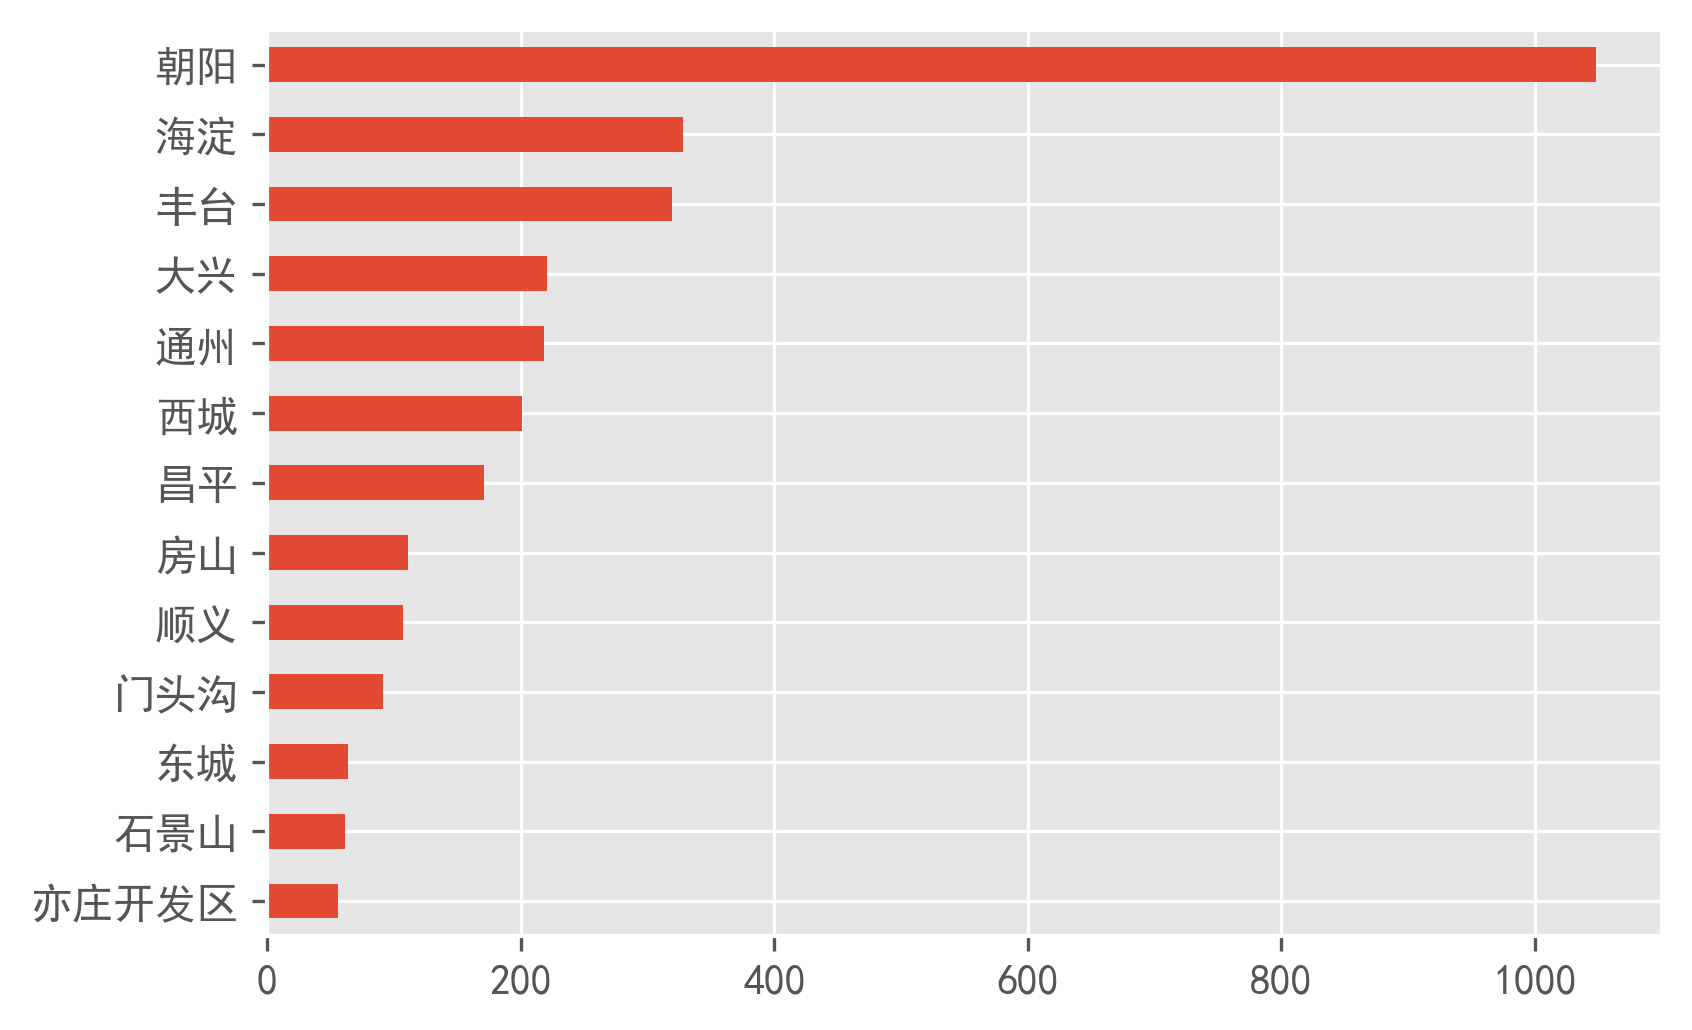

In [6]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()


C:\Users\xvolcano\AppData\Local\Temp/ipykernel_19480/1963850335.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='上海']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

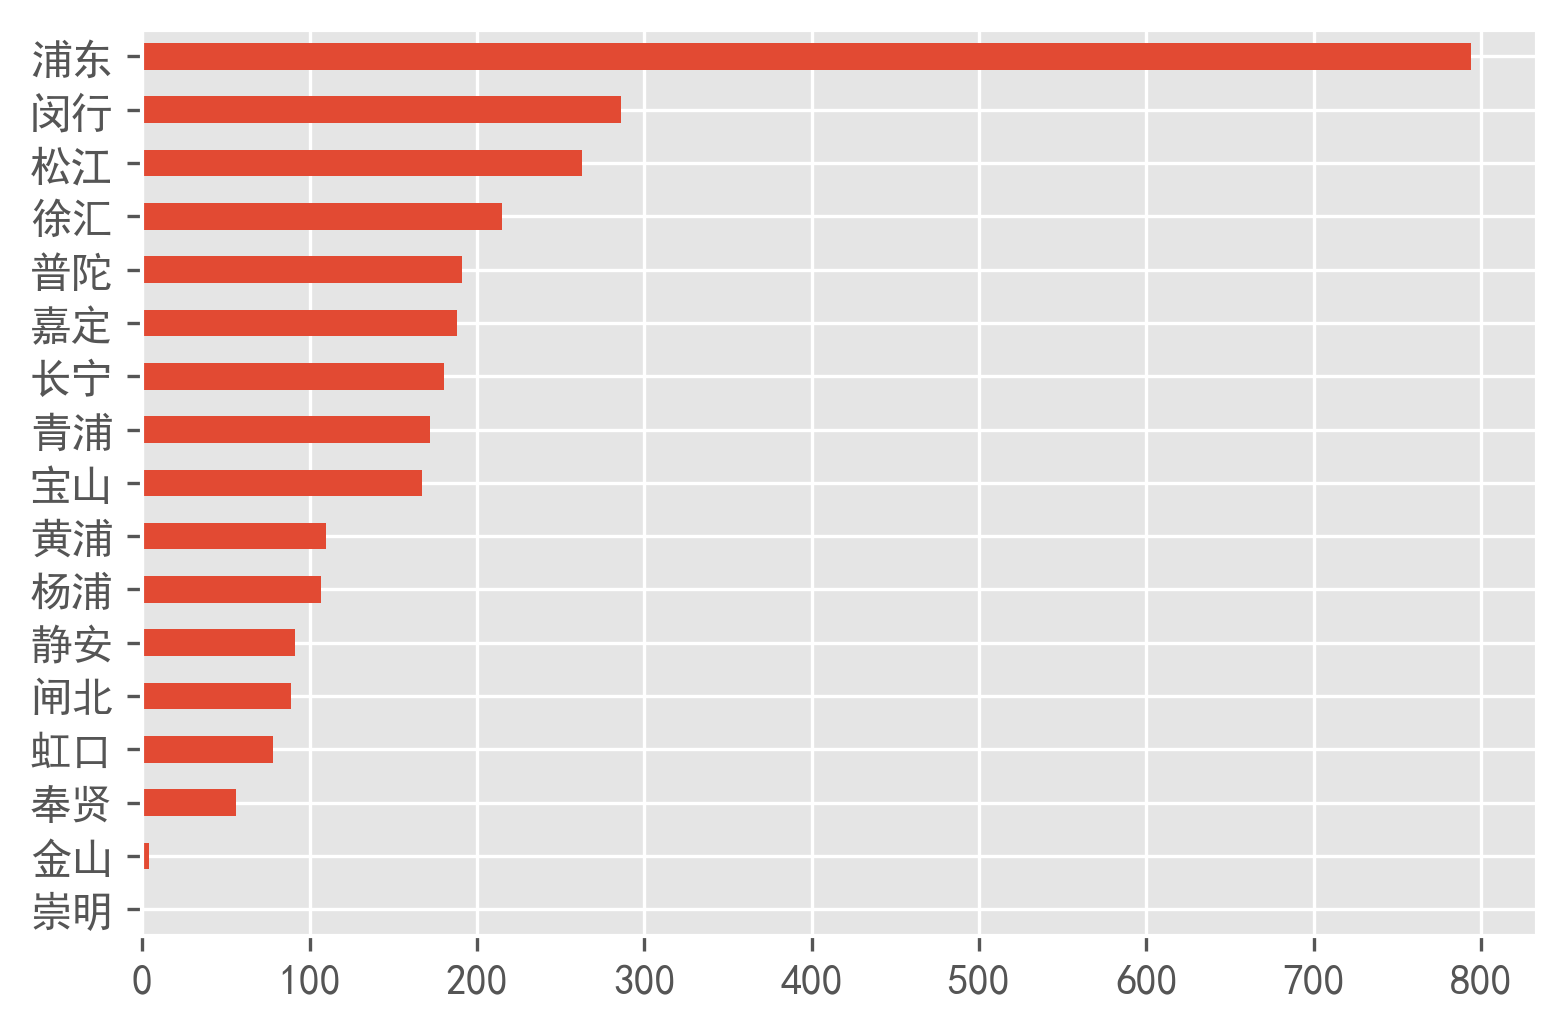

In [7]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='上海']['dist'].value_counts(ascending=True).plot.barh()


C:\Users\xvolcano\AppData\Local\Temp/ipykernel_19480/1249092083.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='广州']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

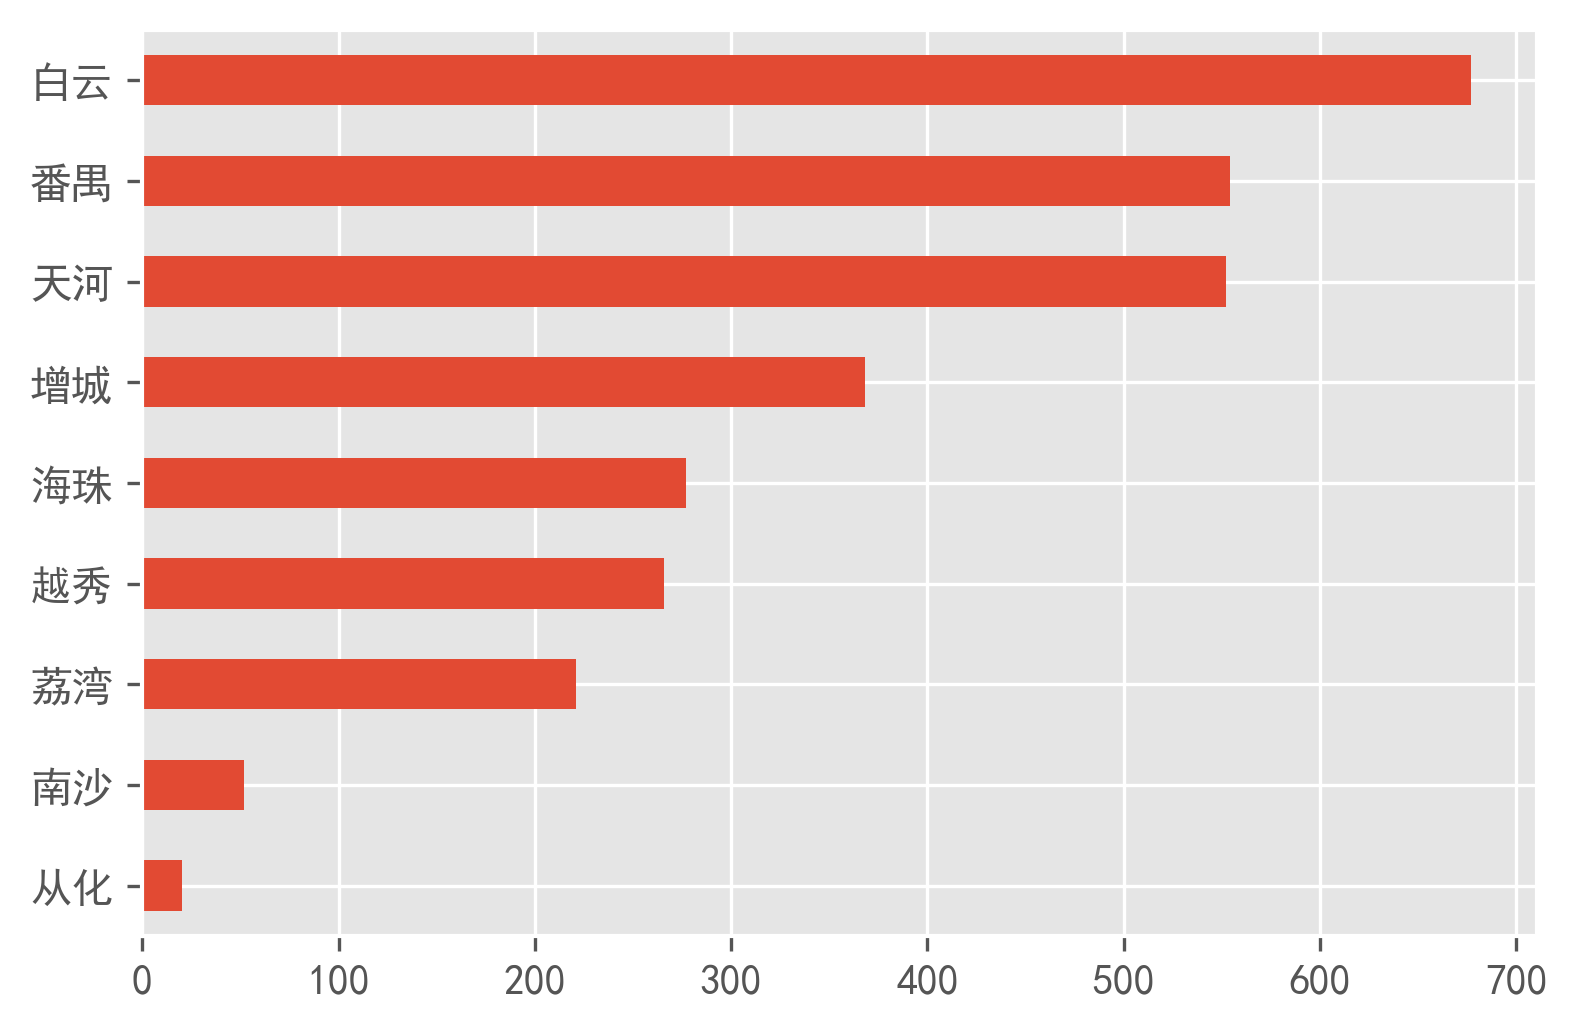

In [8]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='广州']['dist'].value_counts(ascending=True).plot.barh()


C:\Users\xvolcano\AppData\Local\Temp/ipykernel_19480/4011840554.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

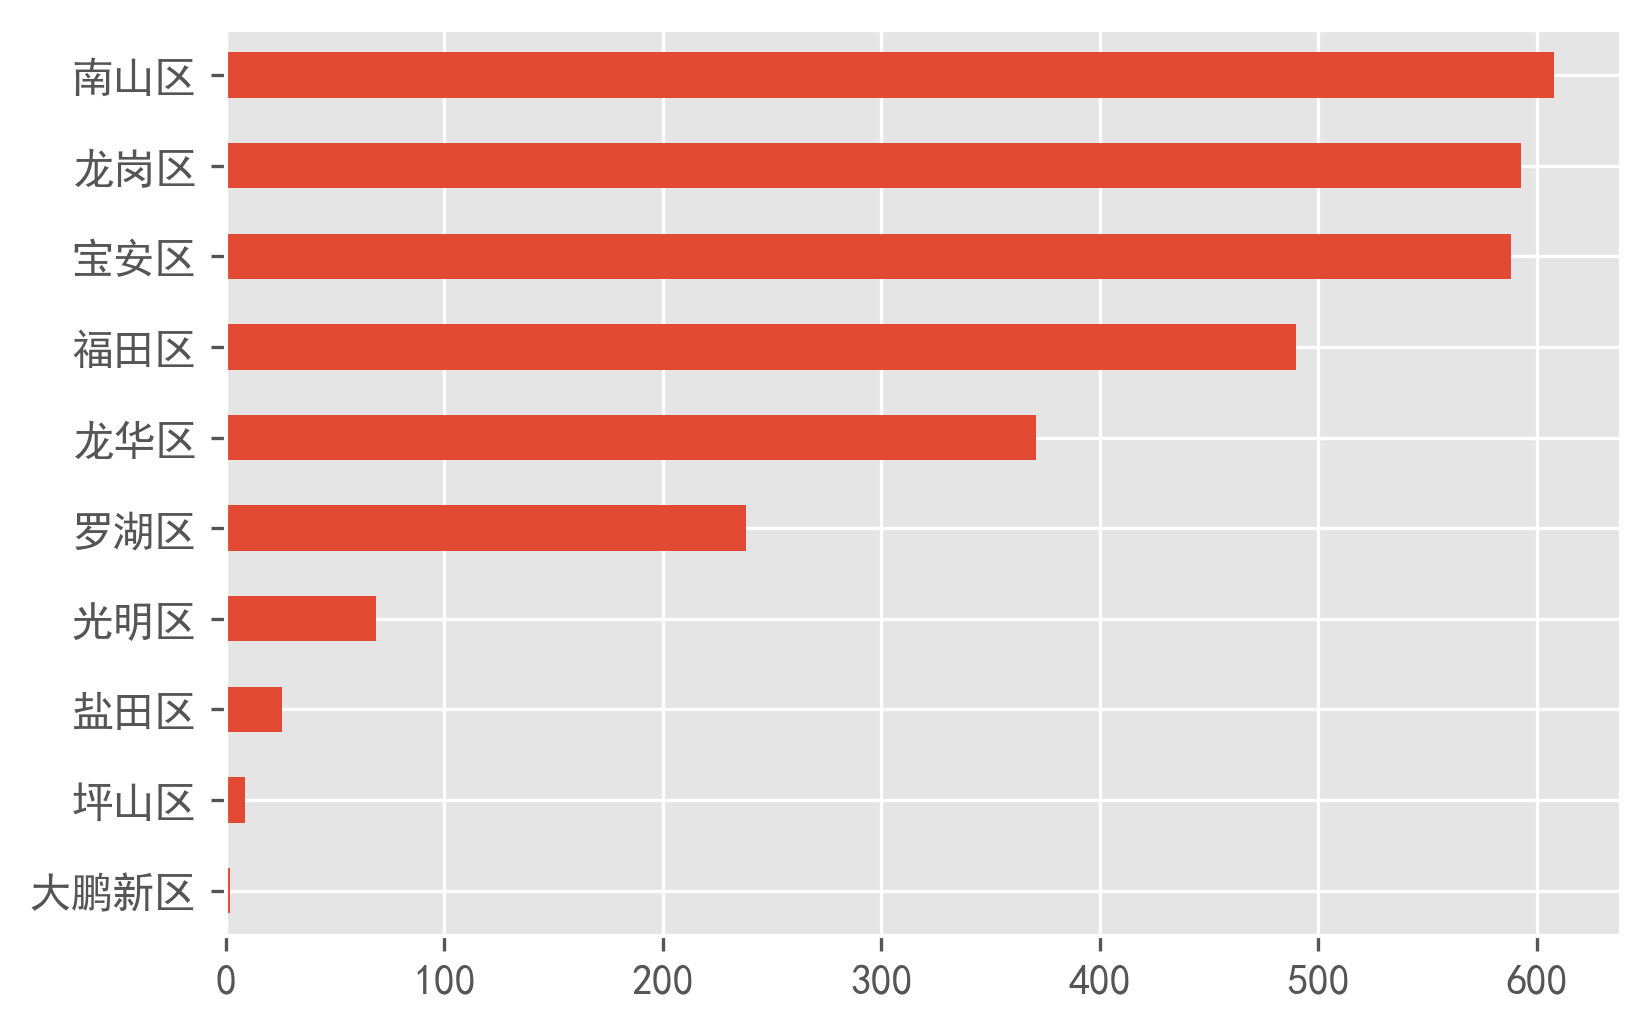

In [9]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['dist'].value_counts(ascending=True).plot.barh()


In [10]:
a=pd.to_numeric(data['rent_price_listing'], errors='coerce')
b=pd.to_numeric(data['rent_area'], errors='coerce')
data['aver_price'] = np.round(a/b, 1)

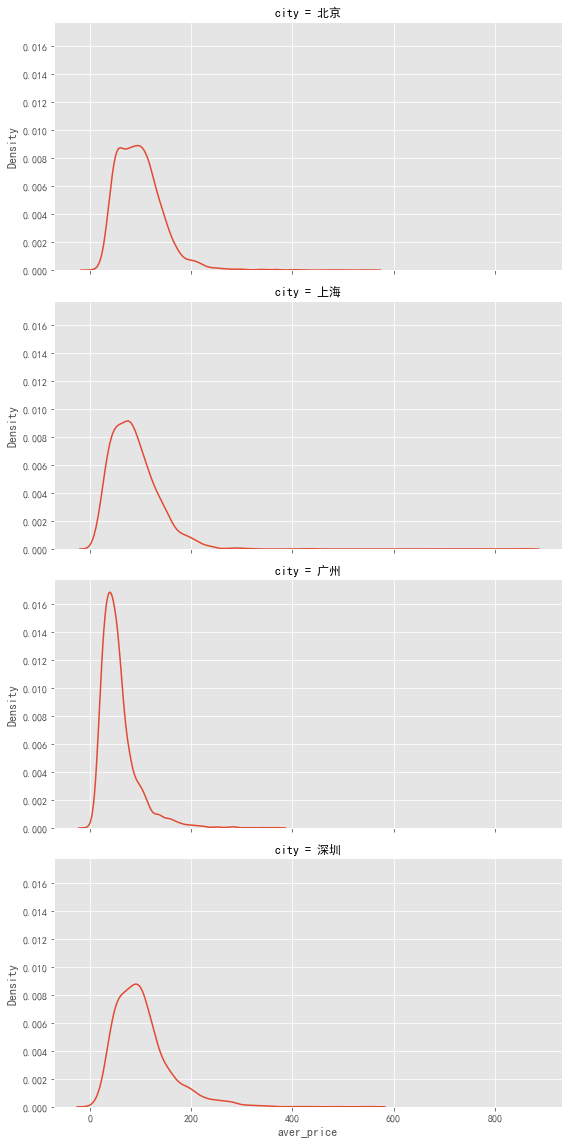

In [11]:
g = sns.FacetGrid(data, row="city", height=4, aspect=2)
g = g.map(sns.kdeplot, "aver_price")

In [12]:
# 由于平均租金基本上都集中在250元/平米/月以内，所以选取这部分数据绘制热力图
def get_city_zf_aver_price(city, city_short, col=['longitude', 'latitude', 'aver_price'], data=data):
    file_name = 'data_' + city_short + '_aver_price.csv'
    data_latlon = data.loc[(data['city']==city)&(data['aver_price']<=250), col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))


In [13]:
get_city_zf_aver_price('北京', 'bj')
get_city_zf_aver_price('上海', 'sh')
get_city_zf_aver_price('广州', 'gz')
get_city_zf_aver_price('深圳', 'sz')


北京的数据一共有2969条
上海的数据一共有2979条
广州的数据一共有2806条
深圳的数据一共有2518条


In [14]:
bc_top10 = data.groupby(['city', 'bizcircle_name'])['aver_price'].mean().nlargest(50).reset_index()['city'].value_counts()


In [42]:
from pyecharts.charts import Bar

bar = Bar("每平米平均租金前50的北上广深商圈数量", width=400)
bar.add("", bc_top10.index, bc_top10.values, is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, is_label_show=True)
bar

ImportError: cannot import name 'Bar' from 'pyecharts.charts' (D:\Anaconda3\lib\site-packages\pyecharts\charts\__init__.py)

In [43]:
def get_top10_bc(city, data=data):
    top10_bc = data[(data['city']==city)&(data['bizcircle_name']!='')].groupby('bizcircle_name')['aver_price'].mean().nlargest(10)
    bar = Bar(city+"市每平米平均租金Top10的商圈", width=600)
    bar.add("", top10_bc.index, np.round(top10_bc.values, 0), is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, xaxis_rotate=30, is_label_show=True)
    return bar


In [17]:
# 北京每平米平均租金Top10的商圈
get_top10_bc('北京')


In [19]:
bc_top10.values


array([28, 12,  9,  1], dtype=int64)

In [20]:
from scipy import stats


In [22]:
def distance_price_relation(city, data=data):
    g = sns.jointplot(x="distance",
                  y="aver_price",
                  data=data[(data['city']==city)&
                            (data['aver_price']<=350)].dropna(subset=['distance']),
                  kind="reg",
                 stat_func=stats.pearsonr)
    g.fig.set_dpi(100)
    g.ax_joint.set_xlabel('最近地铁距离', fontweight='bold')
    g.ax_joint.set_ylabel('每平米租金', fontweight='bold')
    return g


TypeError: regplot() got an unexpected keyword argument 'stat_func'

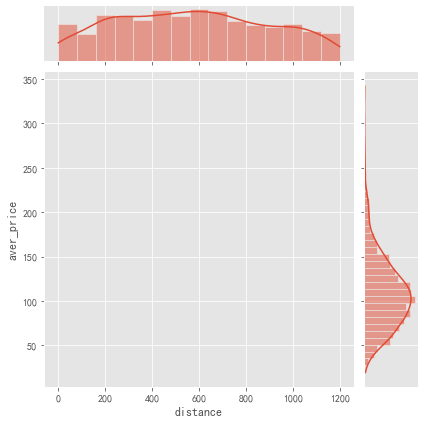

In [23]:
distance_price_relation('北京')


In [28]:
def area_price_relation(city, data=data):
    fig = plt.figure(dpi=100)
    g = sns.lineplot(x="rent_area",
                     y="aver_price",
                     data=data[(data['city']==city)&(pd.to_numeric(data['rent_area'],errors='coerce')<150)],
                     ci=None)
    g.set_xlabel('面积', fontweight='bold')
    g.set_ylabel('每平米均价', fontweight='bold')
    return g

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

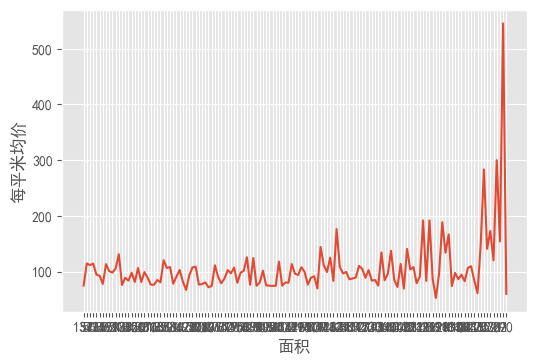

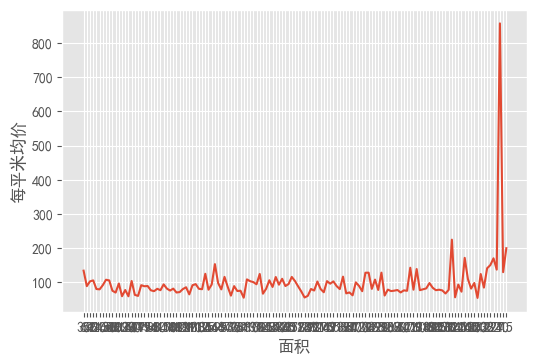

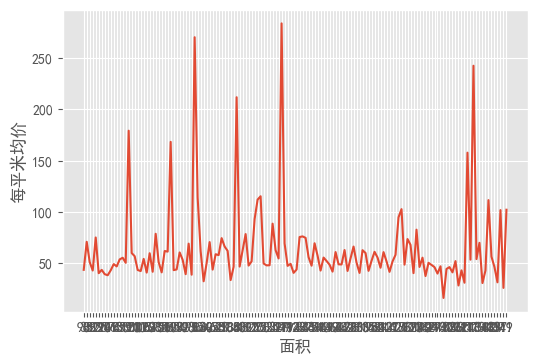

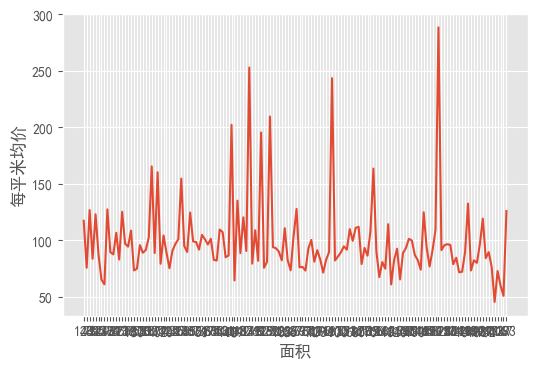

In [30]:
area_price_relation('北京')
area_price_relation('上海')
area_price_relation('广州')
area_price_relation('深圳')

In [31]:
data['is_dep'] = (data['house_title'].str.contains('公寓') + data['house_tag'].str.contains('公寓')) > 0

In [32]:
for city in ['北京', '上海', '广州', '深圳']:
    print(city+'的公寓占总房源量比重为:{}%。'.format(
        np.round(data[data['city']==city]['is_dep'].mean()*100, 2)))


北京的公寓占总房源量比重为:2.0%。
上海的公寓占总房源量比重为:4.17%。
广州的公寓占总房源量比重为:20.23%。
深圳的公寓占总房源量比重为:49.87%。


In [33]:
is_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==1)].groupby('city')['aver_price'].mean()
not_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==0)].groupby('city')['aver_price'].mean()


In [40]:
from pyecharts.charts import *
bar = Bar()
# bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
# bar.add_yaxis("商家A",[5,20,36,10,75,90])
# bar.render()
bar.add('x_axis')

TypeError: __add() missing 2 required positional arguments: 'x_axis' and 'y_axis'

In [41]:
import pyecharts

print(pyecharts.__version__)


0.1.9.4


In [49]:
print(bc_top10.values.tolist())

[28, 12, 9, 1]


In [51]:
data.head(5)
data['longitude']

0        116.317831
1        116.292291
2        116.466150
3        116.348521
4        116.431393
            ...    
11995    113.913322
11996    114.058592
11997    113.991743
11998    114.252572
11999    114.115749
Name: longitude, Length: 12000, dtype: float64

In [52]:
data['latitude']


0        40.039000
1        39.856662
2        39.963231
3        39.930655
4        39.957079
           ...    
11995    22.484478
11996    22.525574
11997    22.593965
11998    22.723471
11999    22.542769
Name: latitude, Length: 12000, dtype: float64